In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',200)

## Problem 1 
Nasze puste wartośći istniejące w zbiorze danych narzucają na kolumny object, ponieważ nan jest domyślnie dla biblioteki pandas widoczne jako float. Także tam gdzie chciałbym int czy boolean robi nam krzaki przynajmniej to co do tej pory udało mi się przjerzeć.
Z odpowiednio dodanymi castoawaniem typu i zamianą danych (i ich zachowaniem) pustych inaczej określone niż domyślnie udało mi się z warnigna zlikiwodać kolumne 7 11 i 12.
## Problem 2 
Dla kolumny 8 Explicti możliwość zmiany nan na domyślnie 0 kolumna boolean. Nie sprawdzałem jeszcze na ile nam to komplikuje w sesie jaką wartość niesie ze sobą kolmuna 8. Zamaina Explict nan na -1.
## Warning
Zlikwidowane wszystkie Warningi poza 8 ale to decyzja patrz problem 2. Kwestia czy wartości zostawiamy float czy może jednak inny typ im castujemy i coś innego niż zero. Zmiana aby pozbyć się warninga i narzucic flota dla 19 wierszy

In [2]:
df_orginal = pd.read_csv('./Orginal_database_from_Kaggle/Final database.csv',dtype={'Track_number':pd.Int8Dtype(),'Tracks_in_album':pd.Int64Dtype()},na_values=('n-a','NA'),sep= ',')
# pd.Int8Dtype() castuje integer for nan values from panda

C:\Users\Data\AppData\Local\Temp\ipykernel_140712\512786828.py:1: DtypeWarning: Columns (8,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_orginal = pd.read_csv('./Orginal_database_from_Kaggle/Final database.csv',dtype={'Track_number':pd.Int8Dtype(),'Tracks_in_album':pd.Int64Dtype()},na_values=('n-a','NA'),sep= ',')


In [3]:
columns = list(df_orginal.columns) # lista nazw wszystkich kolumn
columns_to_check = [13,14,15,16,17,18,19,20,21,22,23,24,25] # lista indesków interesujących nas kolumn z warninga

In [4]:
def swich(filed):  # funncjka aby dokonac podmiany wartośći do wykrzystania przy parametrze converters
    if filed == 'n\x07':
        return  0
    else:
        return float(filed) # nadanie float i tym samym zapewnnie kolumnie odpowiedniego typu
    

In [5]:
columns_to_change = {} # slownik złożony z  columns_to_check i funkcji swich
for i,j in enumerate(columns):
        if i in columns_to_check:
            columns_to_change[j] = swich

In [6]:
df = pd.read_csv('./Orginal_database_from_Kaggle/Final database.csv',dtype={'Track_number':pd.Int8Dtype(),'Tracks_in_album':pd.Int64Dtype()},na_values=('n-a','NA'),sep= ',',converters=columns_to_change)
# pd.Int8Dtype() castuje integer for nan values from panda

C:\Users\Data\AppData\Local\Temp\ipykernel_140712\1933048488.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Orginal_database_from_Kaggle/Final database.csv',dtype={'Track_number':pd.Int8Dtype(),'Tracks_in_album':pd.Int64Dtype()},na_values=('n-a','NA'),sep= ',',converters=columns_to_change)


In [7]:
df['Release_date'] = pd.to_datetime(df['Release_date'])

In [8]:
df.rename(columns = {'album':'album_T_F','country': 'country_T_F'}, inplace=True)
df['Explicit'] = df['Explicit'].fillna(value=-1)


In [10]:
#df.to_csv('./Orginal_database_from_Kaggle/Final_database_updated.csv')

In [9]:
df_1 = pd.read_csv('./Orginal_database_from_Kaggle/Database to calculate popularity.csv')

In [10]:
df_1[df_1.title == ' Here Comes Santa Claus '][df_1.country == 'Ireland' ].groupby(['title','country'])['position'].sum()

C:\Users\Data\AppData\Local\Temp\ipykernel_140712\2552859679.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1[df_1.title == ' Here Comes Santa Claus '][df_1.country == 'Ireland' ].groupby(['title','country'])['position'].sum()


title                     country
 Here Comes Santa Claus   Ireland    578.0
Name: position, dtype: float64

In [53]:
df_1

,Unnamed: 0,country,date,position,uri,track,title,artist
0,0,Global,05/11/2020,1.0,https://open.spotify.com/track/47EiUVwUp4C9fGc...,"Dakiti , Bad Bunny, Jhay Cortez",Dakiti,"Bad Bunny, Jhay Cortez"
1,1,Global,05/11/2020,2.0,https://open.spotify.com/track/35mvY5S1H3J2QZy...,"positions , Ariana Grande",positions,Ariana Grande
2,2,Global,05/11/2020,3.0,https://open.spotify.com/track/3tjFYV6RSFtuktY...,"Mood , 24kGoldn",Mood,24kGoldn
3,3,Global,05/11/2020,4.0,https://open.spotify.com/track/7hxHWCCAIIxFLCz...,"Lemonade , Internet Money",Lemonade,Internet Money
4,4,Global,05/11/2020,5.0,https://open.spotify.com/track/4y4spB9m0Q6026K...,"Lonely , Justin Bieber",Lonely,Justin Bieber
...,...,...,...,...,...,...,...,...
9806996,9806996,Taiwan,01/01/2017,197.0,https://open.spotify.com/track/3zHq9ouUJQFQRf3...,"Love Me Like You Do - From ""Fifty Shades Of G...","Love Me Like You Do - From ""Fifty Shades Of G...",Ellie Goulding
9806997,9806997,Taiwan,01/01/2017,198.0,https://open.spotify.com/track/3CRDbSIZ4r5MsZ0...,"Stressed Out , Twenty One Pilots",Stressed Out,Twenty One Pilots
9806998,9806998,Taiwan,01/01/2017,199.0,https://open.spotify.com/track/2mEvsc8k8iwR099...,"The End - From ""La La Land"" Soundtrack , Just...","The End - From ""La La Land"" Soundtrack",Justin Hurwitz
9806999,9806999,Taiwan,01/01/2017,200.0,https://open.spotify.com/track/0L7loeTIg6akW84...,"Light It Up - Remix , Major Lazer",Light It Up - Remix,Major Lazer


In [56]:
df[df.Artist == 'Ed Sheeran'].groupby(['Title'])['Artist_followers'].sum()

Title
afire love                                                        7.178310e+07
all of the stars                                                  7.178310e+07
baby one more time - recorded at spotify studios new york city    1.866361e+09
barcelona                                                         2.512409e+09
bibia be ye ye                                                    2.512409e+09
bloodstream                                                       6.460479e+08
candle in the wind - 2018 version                                 4.306986e+08
castle on the hill                                                2.512409e+09
castle on the hill - acoustic                                     2.153493e+08
castle on the hill - recorded at spotify studios new york city    7.178310e+07
cold coffee                                                       7.178310e+07
dive                                                              2.512409e+09
dont                                          

In [12]:
by_country = df.groupby(['Artist','Title','Country'])['Release_date'].count().sort_values(ascending=False)
by_country

Artist                  Title                                          Country 
Bobby Helms             jingle bell rock                               Austria     3
The Darkness            christmas time                                 UK          3
Post Malone - Swae Lee  sunflower - spider-man: into the spider-verse  UK          3
                                                                       Turkey      3
Darlene Love            christmas                                      Austria     3
                                                                                  ..
Gorillaz - Kali Uchis   shes my collar                                 Portugal    1
                                                                       Poland      1
                                                                       Ireland     1
                                                                       Global      1
龔詩嘉                     如果你真愛我                                        

<AxesSubplot:xlabel='Country'>

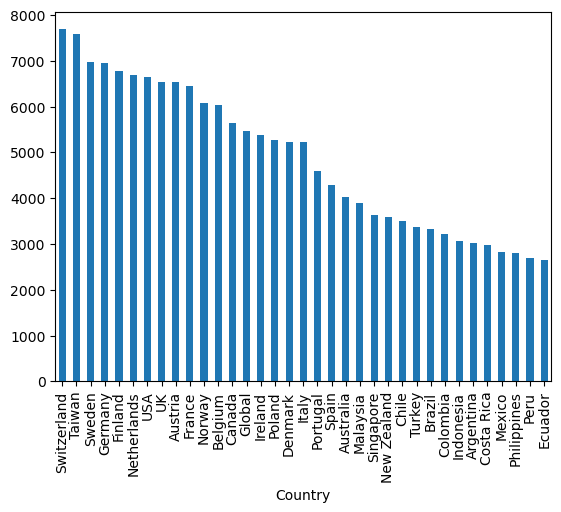

In [42]:
by_country =df.groupby(['Country'])['Title'].count().sort_values(ascending=False)
by_country.plot(kind = 'bar')

<AxesSubplot:xlabel='Country'>

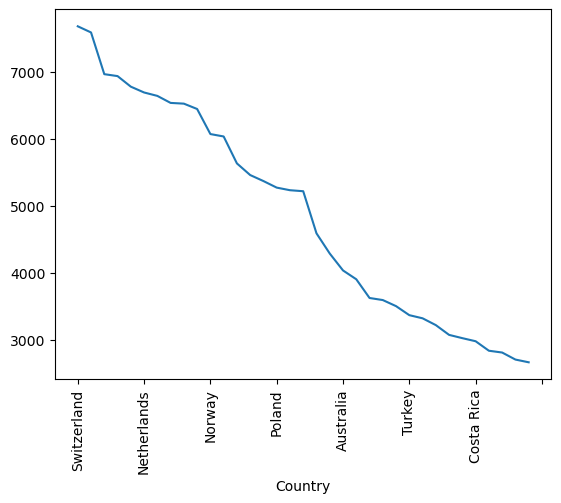

In [308]:
by_country =df.groupby(['Country'])['Release_date'].count().sort_values(ascending=False)
by_country.plot(rot = 90)

<AxesSubplot:xlabel='Country'>

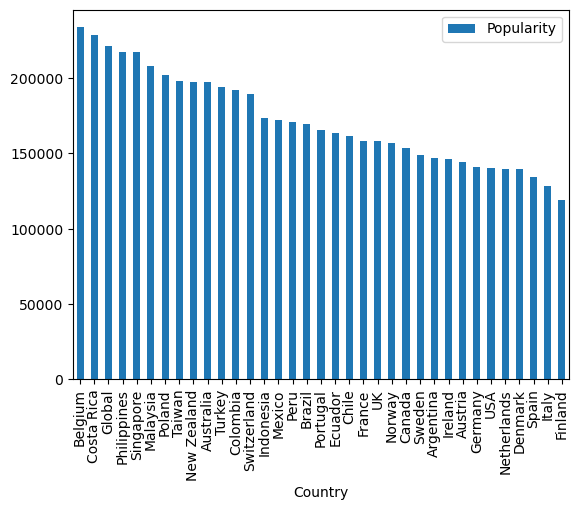

In [14]:
by_country = pd.DataFrame(df.groupby(['Country'])['Popularity'].max().sort_values(ascending=False))
by_country.plot(kind='bar')

<AxesSubplot:xlabel='Cluster'>

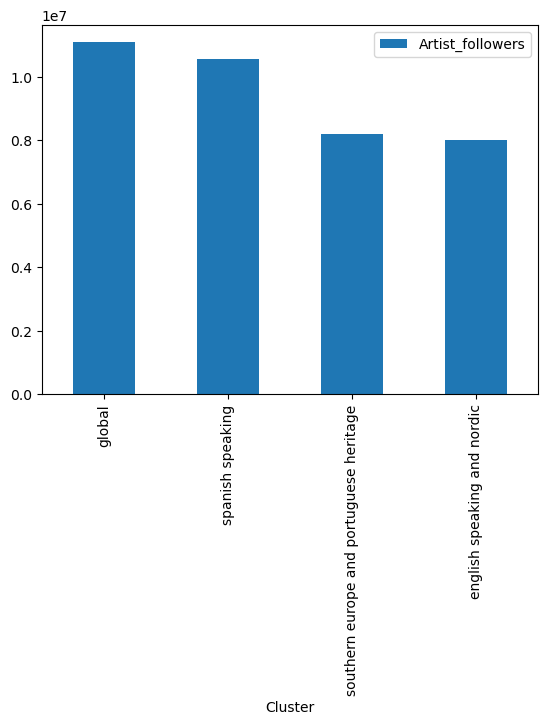

In [290]:
by_country = pd.DataFrame(df.groupby(['Cluster'])['Artist_followers'].mean().sort_values(ascending=False))
by_country.plot(kind='bar')

In [305]:
by_country = pd.DataFrame(df.groupby(['Artist','Country'])['Artist_followers'].count().sort_values(ascending=False))
by_country.describe()

,Artist_followers
count,79492.000000
mean,2.145964
std,4.331610
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,204.000000


<AxesSubplot:ylabel='Frequency'>

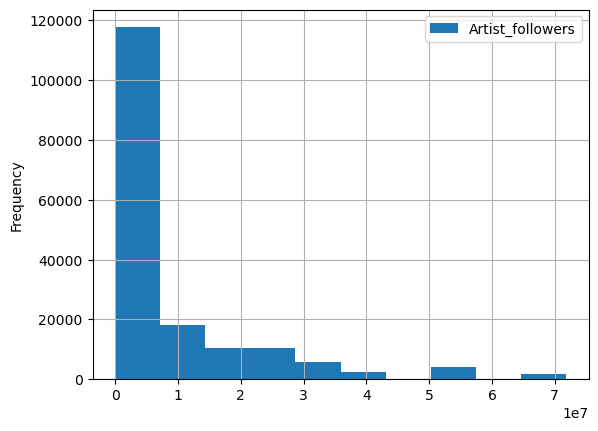

In [18]:
df[['Artist_followers']].plot( kind='hist',grid=True,bins = 10)

### Data wypuszczenia może posłuzyć do sprawdzenia czasu pomiedzy utowrami dla poszczególnych artystów.

In [13]:
df.head()

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,album_T_F,compilation,single,bolero,boy band,country_T_F,dance/electronic,else,funk,hip hop,house,indie,jazz,k-pop,latin,metal,opm,pop,r&b/soul,rap,reggae,reggaeton,rock,trap,syuzhet_norm,bing_norm,afinn_norm,nrc_norm,syuzhet,bing,afinn,nrc,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm,negative_norm,positive_norm,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,Negative_Bayes,Neutral_Bayes,Positive_Bayes,LDA_Topic,Celebrate,Desire,Explore,Fun,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Denmark,Ecuador,Finland,France,Germany,Global,Indonesia,Ireland,Italy,Malaysia,Mexico,Netherlands,New Zealand,Norway,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1.0,-4.47,1.0,0.336,0.323,0.0,0.0676,0.72,171.993,258639.0,4.0,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1.0,-4.47,1.0,0.336,0.323,0.0,0.0676,0.72,171.993,258639.0,4.0,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1.0,-4.47,1.0,0.336,0.323,0.0,0.0676,0.72,171.993,258639.0,4.0,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1.0,-4.47,1.0,0.336,0.323,0.0,0.0676,0.72,171.993,258639.0,4.0,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/t

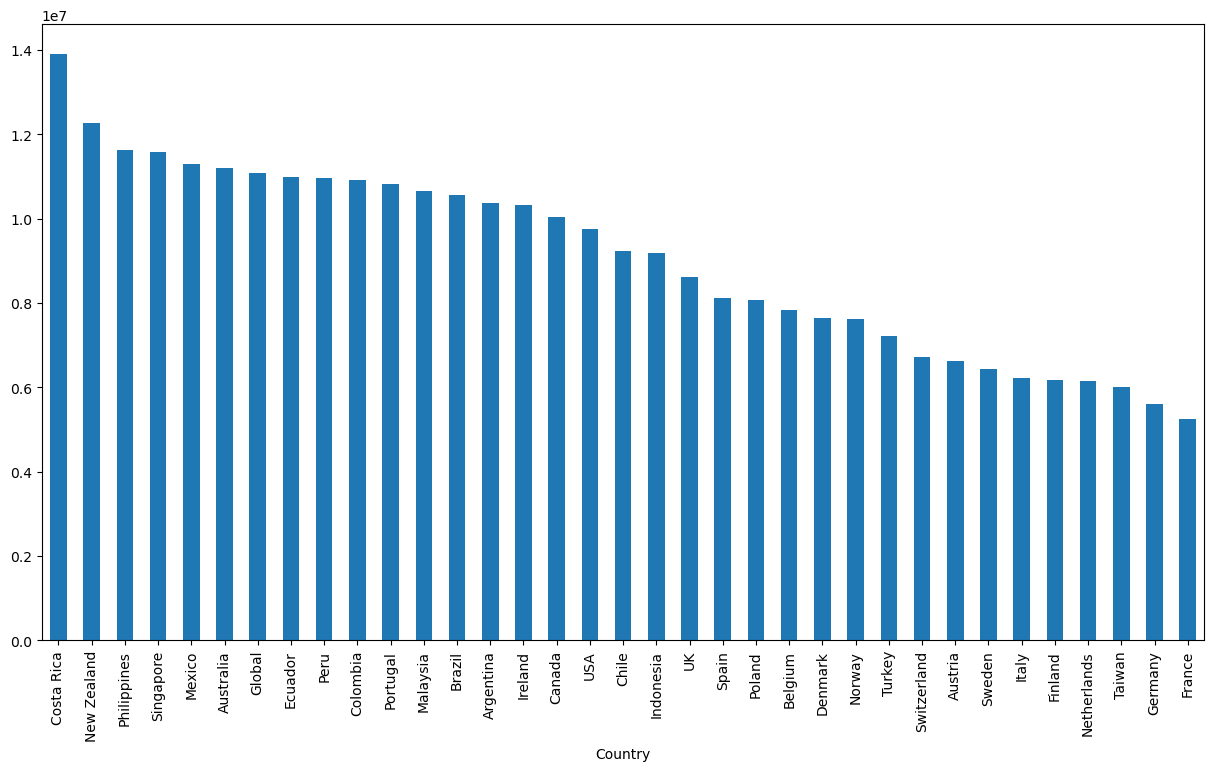

In [48]:
lista_artist = df.groupby('Country')['Artist_followers'].mean().sort_values(ascending=False)
lista_artist.plot(kind='bar', figsize=(15,8));


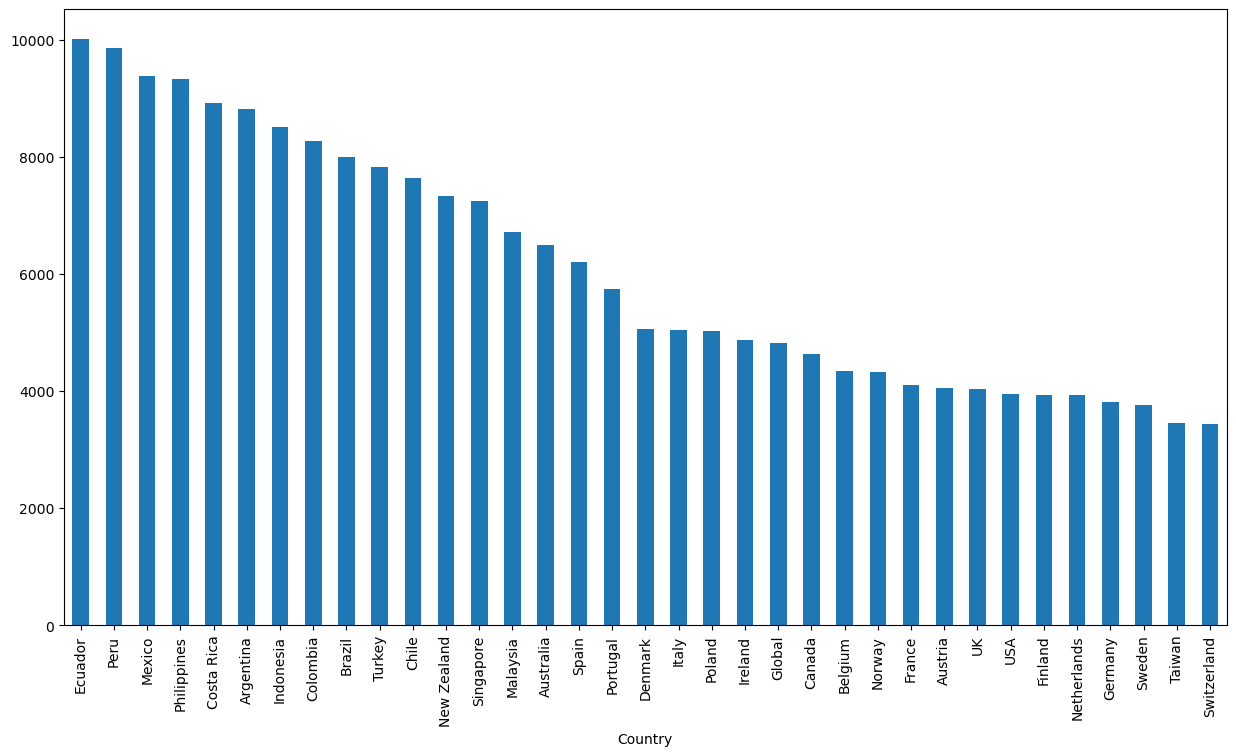

In [19]:
lista_popularity = df_orginal.groupby('Country')['Popularity'].mean().sort_values(ascending=False)
lista_popularity.plot(kind='bar', figsize=(15,8));

In [48]:
lista = df_orginal.groupby('Country')['Popularity'].idxmax()
lista
kraj_song = df_orginal.loc[lista,['Country','Popularity','Title']]

In [49]:
kraj_song.Title.value_counts()

shape of you                22
me rehúso                    4
dance monkey                 2
say you wont let go          2
dan...                       1
shallow                      1
something just like this     1
geceler                      1
sicko mode                   1
Name: Title, dtype: int64

In [371]:
#.iloc[91955,[1,2,13,14,15,16,17,18,19,20,21,22,23,24,25]] #sprawdzanie konkretnego wiersza i kolmun dla niego

In [369]:
#df.info(verbose=True, show_counts=True)
# sprawdzenie kolumn ich typów oraz ilości zliczonych wartości innych niż null

In [114]:
#df.iloc[:,[7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]]
# stowrzenie fragemtnu całe tabeli na podstawie kolumn z warnigniem dla orginały niżej skomentowane to samo ale juz dla poprawionej 
#df.iloc[:,[8,13,14,15,16,17,18,19,20,21,22,23,24,25]] 

In [38]:
df_orginal[df_orginal.Genre == 'n-a']

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,album,compilation,single,bolero,boy band,country,dance/electronic,else,funk,hip hop,house,indie,jazz,k-pop,latin,metal,opm,pop,r&b/soul,rap,reggae,reggaeton,rock,trap,syuzhet_norm,bing_norm,afinn_norm,nrc_norm,syuzhet,bing,afinn,nrc,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm,negative_norm,positive_norm,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,Negative_Bayes,Neutral_Bayes,Positive_Bayes,LDA_Topic,Celebrate,Desire,Explore,Fun,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Denmark,Ecuador,Finland,France,Germany,Global,Indonesia,Ireland,Italy,Malaysia,Mexico,Netherlands,New Zealand,Norway,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster


In [99]:
df.head(5)

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,album_T_F,compilation,single,bolero,boy band,country_T_F,dance/electronic,else,funk,hip hop,house,indie,jazz,k-pop,latin,metal,opm,pop,r&b/soul,rap,reggae,reggaeton,rock,trap,syuzhet_norm,bing_norm,afinn_norm,nrc_norm,syuzhet,bing,afinn,nrc,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm,negative_norm,positive_norm,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,Negative_Bayes,Neutral_Bayes,Positive_Bayes,LDA_Topic,Celebrate,Desire,Explore,Fun,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Denmark,Ecuador,Finland,France,Germany,Global,Indonesia,Ireland,Italy,Malaysia,Mexico,Netherlands,New Zealand,Norway,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1.0,-4.47,1.0,0.336,0.323,0.0,0.0676,0.72,171.993,258639.0,4.0,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1.0,-4.47,1.0,0.336,0.323,0.0,0.0676,0.72,171.993,258639.0,4.0,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1.0,-4.47,1.0,0.336,0.323,0.0,0.0676,0.72,171.993,258639.0,4.0,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1.0,-4.47,1.0,0.336,0.323,0.0,0.0676,0.72,171.993,258639.0,4.0,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/t

In [112]:
lda_topic = df.groupby('LDA_Topic',)['Popularity'].mean().sort_values().reset_index()

In [113]:
lda_topic_country = df.groupby('LDA_Topic')['Artist_followers'].mean().sort_values().reset_index()

Text(0.5, 1.0, 'SUM_Popularity')

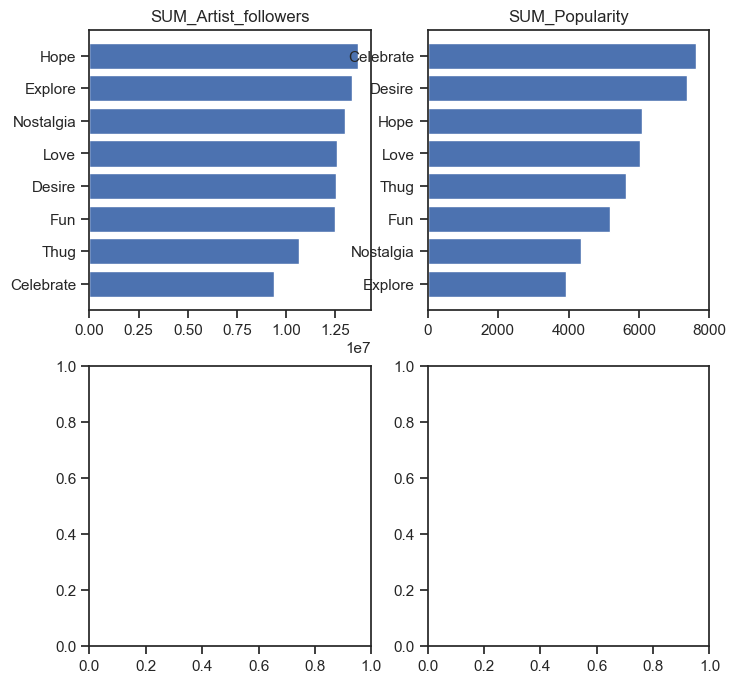

In [114]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax[0,0].barh(lda_topic_country.LDA_Topic,lda_topic_country.Artist_followers)
ax[0,0].set_title('SUM_Artist_followers')
ax[0,1].barh(lda_topic.LDA_Topic,lda_topic.Popularity)
ax[0,1].set_title('SUM_Popularity')

<AxesSubplot:ylabel='Country,LDA_Topic'>

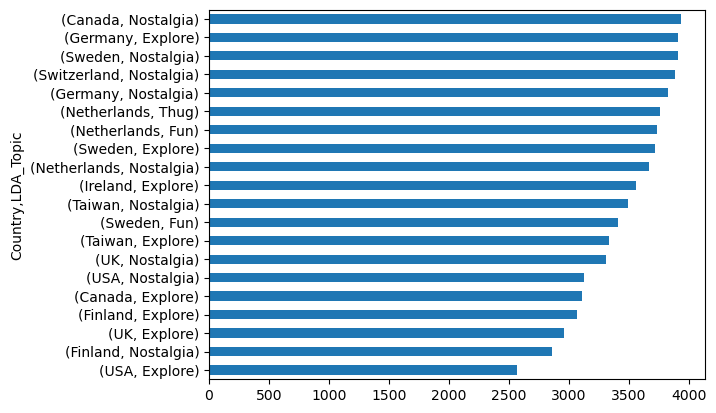

In [129]:
lda_topic = df[df.Cluster == 'english speaking and nordic'].groupby(['Country','LDA_Topic'])['Popularity'].mean().sort_values(ascending=True)
lda_topic.head(20).plot(kind= 'barh')

<AxesSubplot:xlabel='Country,Cluster'>

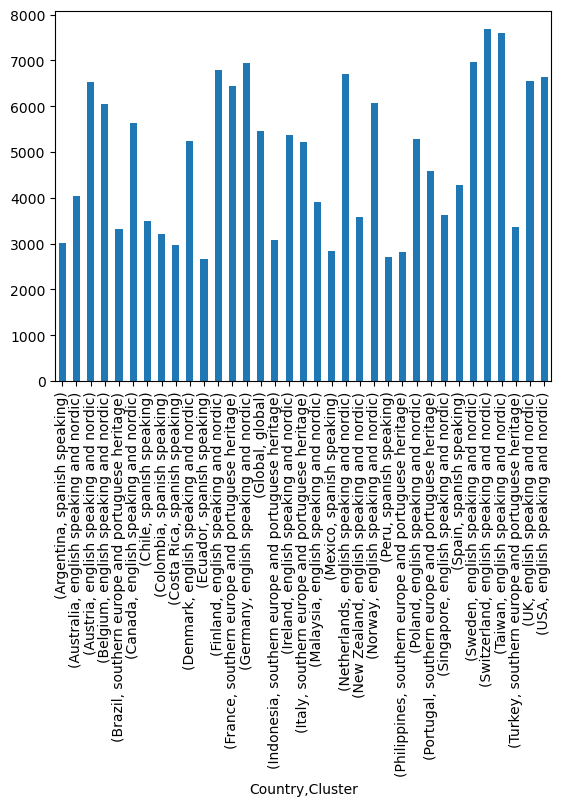

In [47]:
lda_topic = df.groupby(['Country','Cluster'])['Cluster'].count()
lda_topic.plot(kind = 'bar')

In [146]:
df[df.Cluster == 'english speaking and nordic'].loc[:,'Country'].unique()

array(['USA', 'Belgium', 'Switzerland', 'Germany', 'Taiwan', 'UK',
       'Austria', 'Australia', 'Canada', 'Finland', 'Ireland', 'Malaysia',
       'Netherlands', 'Norway', 'New Zealand', 'Poland', 'Sweden',
       'Singapore', 'Denmark'], dtype=object)

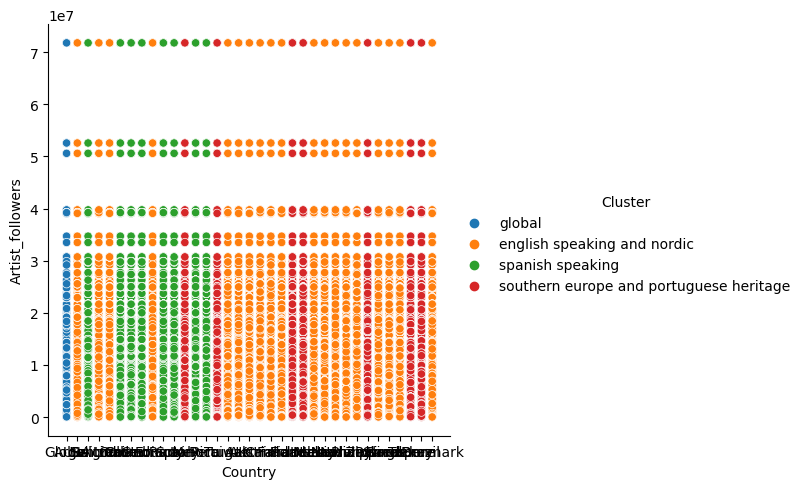

In [43]:
sns.relplot(data=df_3 ,x='Country', y='Artist_followers', hue='Cluster')

In [21]:
df_3 = df[['Country','Cluster','Popularity']].sort_values(by= ['Cluster'])

[Text(0, 0, 'USA'),
 Text(1, 0, 'Ireland'),
 Text(2, 0, 'Denmark'),
 Text(3, 0, 'UK'),
 Text(4, 0, 'Singapore'),
 Text(5, 0, 'Malaysia'),
 Text(6, 0, 'Sweden'),
 Text(7, 0, 'Norway'),
 Text(8, 0, 'Poland'),
 Text(9, 0, 'New Zealand'),
 Text(10, 0, 'Belgium'),
 Text(11, 0, 'Australia'),
 Text(12, 0, 'Austria'),
 Text(13, 0, 'Netherlands'),
 Text(14, 0, 'Germany'),
 Text(15, 0, 'Taiwan'),
 Text(16, 0, 'Finland'),
 Text(17, 0, 'Canada'),
 Text(18, 0, 'Switzerland'),
 Text(19, 0, 'Global'),
 Text(20, 0, 'Italy'),
 Text(21, 0, 'France'),
 Text(22, 0, 'Portugal'),
 Text(23, 0, 'Indonesia'),
 Text(24, 0, 'Brazil'),
 Text(25, 0, 'Philippines'),
 Text(26, 0, 'Turkey'),
 Text(27, 0, 'Argentina'),
 Text(28, 0, 'Costa Rica'),
 Text(29, 0, 'Chile'),
 Text(30, 0, 'Mexico'),
 Text(31, 0, 'Peru'),
 Text(32, 0, 'Spain'),
 Text(33, 0, 'Colombia'),
 Text(34, 0, 'Ecuador')]

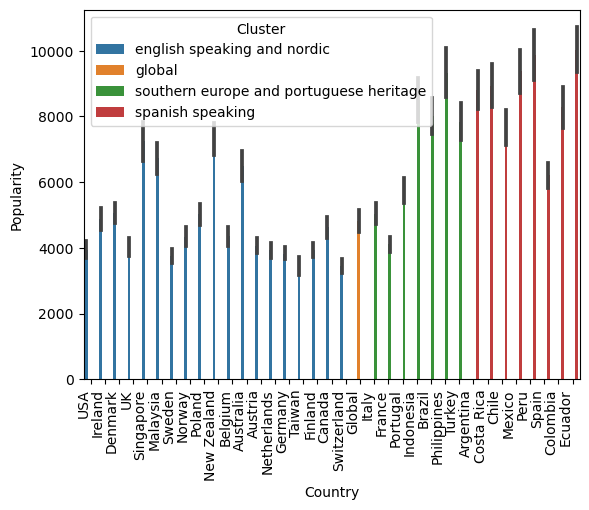

In [60]:
#g = sns.scatterplot(data=df_3, x="Country", y="Popularity", hue="Cluster",)
g = sns.barplot(data=df_3, x="Country", y="Popularity", hue="Cluster",)
g.set_xticklabels(g.get_xticklabels(), rotation=90,
                        horizontalalignment='right')